In [1]:
import pyAMARES

Current pyAMARES version is 0.3.0
Author: Jia Xu, MR Research Facility, University of Iowa


# Fitting MRS with unknown species, using HSVDinitializer
**[Try this tutorial on Google Colab!](https://colab.research.google.com/drive/15zKm0rqnVheYwk-5D2orwNalTDu5a6zg)**

- First, simulate a spectrum with two peaks

Warning, fid is None!
Checking comment lines in the prior knowledge file
Comment: in line 0 #  An example of singlet,,



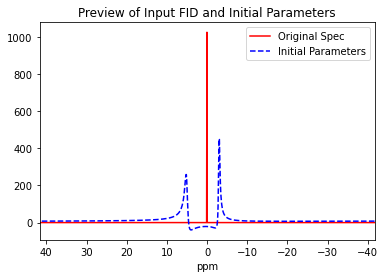

Printing the Prior Knowledge File /home/xujia/gitlab/pyAMARES/docs/source/notebooks/attachment/singlet.csv


,Peak_A,Peak_B
Index,,
Initial Values,NaN,NaN
amplitude,10,8
chemicalshift,5,-3
linewidth,100,50
phase,0,0
g,0,0
Bounds,NaN,NaN
amplitude,"(0,","(0,"
chemicalshift,NaN,NaN


In [2]:
priorknowledge = pyAMARES.initialize_FID(fid=None,
                                priorknowledgefile='/home/xujia/gitlab/pyAMARES/docs/source/notebooks/attachment/singlet.csv',
                                preview=True) 

- **Simulate an MRS Spectra Using Scanner Parameters**:
    - **MHz (Field Strength)**: 300 MHz. 
    - **sw (Spectral Width)**: 5000.0 Hz.
    - **Deadtime**: 100 microseconds (100e-6 seconds).
    - **Number of Points (fid_len)**: 1024
    - **SNR (Signal to Noise Ratio, snr_target)**: 40.

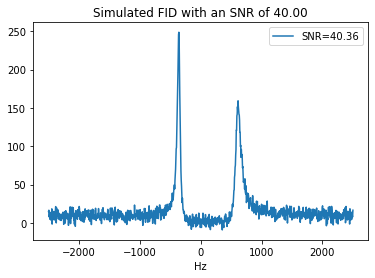

In [3]:
fid = pyAMARES.kernel.fid.simulate_fid(priorknowledge.initialParams, 
                                       MHz=300.0, 
                                       sw=5000.0, 
                                       deadtime=100e-6, 
                                       fid_len=1024, 
                                       snr_target=40 , 
                                       preview=True)

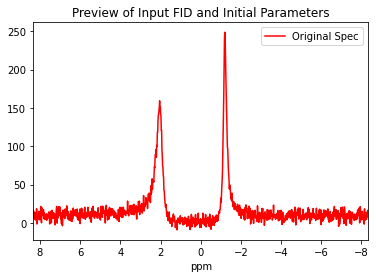

In [4]:
FIDobj =  pyAMARES.initialize_FID(fid=fid,
                                  MHz=300.0, 
                                  sw=5000.0, 
                                  deadtime=100e-6,
                                  priorknowledgefile=None,
                                  preview=True, 
                                 normalize_fid=False) 

Norm of residual= 50.087
Norm of the data=1848.810
resNormSq / dataNormSq = 0.027


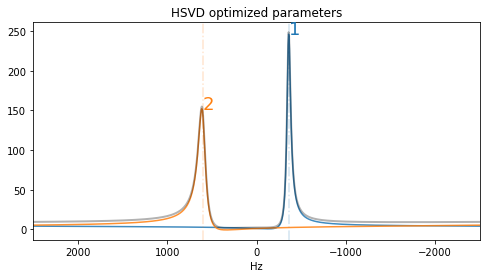

In [5]:
params_hsvd = pyAMARES.HSVDinitializer(fid_parameters=FIDobj, 
                                      num_of_component=2, 
                                      fitting_parameters=None, 
                                       preview=True)

In [6]:
params_hsvd

name,value,initial value,min,max,vary
ak_1,8.00411490,8.004114899421369,-inf,inf,True
freq_1,-359.992953,-359.9929526890721,-inf,inf,True
dk_1,159.839755,159.83975493389474,0.00000000,inf,True
phi_1,1.0944e-04,0.00010944089342795904,-3.14159265,3.14159265,True
g_1,0.00000000,0.0,-1.00000000,1.00000000,False
ak_2,9.97848999,9.97848999424057,-inf,inf,True
freq_2,600.082463,600.0824626203446,-inf,inf,True
dk_2,316.144438,316.14443800037355,0.00000000,inf,True
phi_2,-0.00266153,-0.0026615333065376457,-3.14159265,3.14159265,True
g_2,0.00000000,0.0,-1.00000000,1.00000000,False


A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 4.080e-06
Fitting with method=least_squares took 0.025023 seconds
pm_index2=[]
No peaklist, probably it is from an HSVD initialized object
There is no result_sum generated, probably there is only 1 peak
Norm of residual= 50.086
Norm of the data=1848.810
resNormSq / dataNormSq = 0.027
plotParameters.xlim=None
xlim=None


/home/xujia/gitlab/pyAMARES/pyAMARES/util/crlb.py:171: RuntimeWarning: Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!
  warnings.warn("Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!" , RuntimeWarning)


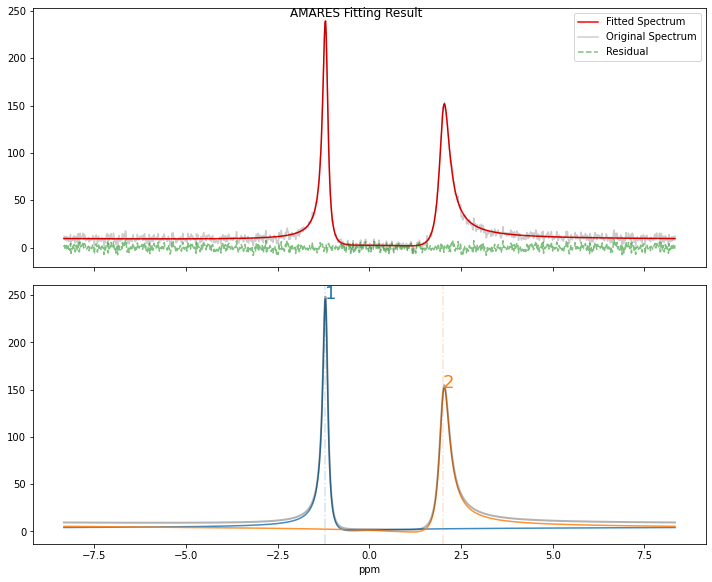

In [7]:
FIDresult = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                               fitting_parameters=params_hsvd, 
                               method='least_squares', 
                               ifplot=True,
                               inplace=False)

In [8]:
FIDresult.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%)
name,,,,,,,,,,,,,,,
1,8.005,0.057,1.234,-1.200,0.001,0.100,50.885,0.507,221.901,0.023,0.406,2457.762,0.000,0.000,inf
2,9.974,0.080,1.395,2.000,0.002,0.133,100.553,1.131,498.422,359.876,0.459,524.732,0.000,0.000,inf


In [9]:
FIDobj.ppm

array([-8.33333333, -8.31704138, -8.30074943, ...,  8.30074943,
        8.31704138,  8.33333333])

# Frequency-Selective AMARES

- Method 1: frequency-selective AMARES using MPFIR filter 
   - References: 
       1. Vanhamme et al, J Mag Reson 143, 1-16(2000)
       2. Sundin et al, J Mag Reson 139, 189-204 (1999)

In [10]:
from pyAMARES import filter_fid_by_ppm, filter_param_by_ppm

In [11]:
fit_ppm = (-.5, 8.2) #ppm

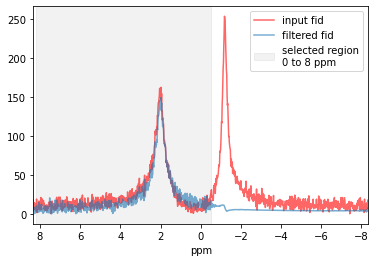

In [12]:
FIDobj2 = pyAMARES.filter_fid_by_ppm(FIDobj, fit_ppm=fit_ppm, ifplot=True)

In [13]:
param2 = filter_param_by_ppm(params_hsvd, fit_ppm=fit_ppm, MHz=FIDobj2.MHz)

fit_Hz=[-150. 2460.]
Check if the expr for all parameters is restricted to a parameter that has already been filtered out.


A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 2.508e-06
Fitting with method=least_squares took 0.025438 seconds
pm_index2=[]
The amplitude of index [0]  is negative! Make it positive and flip the phase!
No peaklist, probably it is from an HSVD initialized object
There is no result_sum generated, probably there is only 1 peak
Norm of residual= 26.493
Norm of the data=668.985
resNormSq / dataNormSq = 0.040
plotParameters.xlim=None
xlim=None


/home/xujia/gitlab/pyAMARES/pyAMARES/util/crlb.py:171: RuntimeWarning: Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!
  warnings.warn("Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!" , RuntimeWarning)


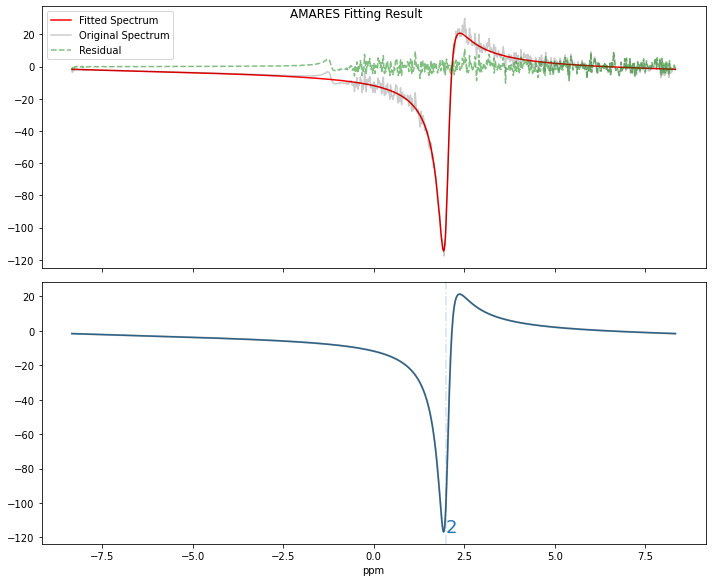

In [18]:
FID_result_positive_ppm_peak = pyAMARES.fitAMARES(fid_parameters=FIDobj2, # Filtered FID object
                               fitting_parameters=param2, 
                               method='least_squares', 
                               ifplot=True,
                               inplace=False)

In [19]:
FID_result_positive_ppm_peak.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%)
name,,,,,,,,,,,,,,,
2,9.016,0.057,0.816,2.000,0.002,0.079,100.596,0.904,295.483,108.865,0.364,0.536,0.000,0.000,inf


- Method 2: Frequency-Selective AMARES using Objective Function with frequency range

In [22]:
??pyAMARES.objective_range

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 4.080e-06
Fitting range -0.4969045291625935 ppm to 8.202997719126751 ppm!
Fitting with method=least_squares took 0.014351 seconds
pm_index2=[]
No peaklist, probably it is from an HSVD initialized object
There is no result_sum generated, probably there is only 1 peak
Norm of residual= 1042.881
Norm of the data=1848.810
resNormSq / dataNormSq = 0.564
plotParameters.xlim=None
xlim=None


/home/xujia/gitlab/pyAMARES/pyAMARES/util/crlb.py:171: RuntimeWarning: Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!
  warnings.warn("Warning: pm_index are all NaNs, return None so that P matrix is a identity matrix!" , RuntimeWarning)


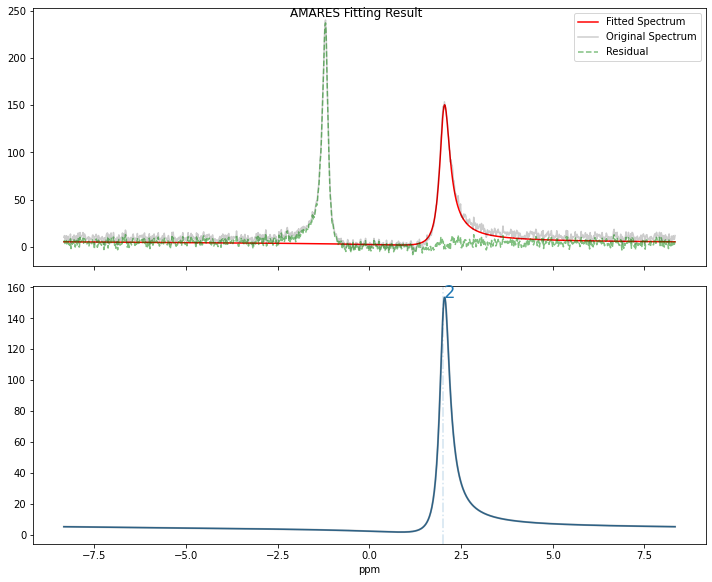

In [20]:
FID_result_positive_ppm_peak2 = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                               fitting_parameters=param2,
                               fit_range=fit_ppm,  # Instead of filtering out the spectrum,  (-.5, 8.2) ppm
                                                   # is passed to the objective_func  
                               objective_func=pyAMARES.objective_range, # This objective_range can accept the `fit_range` argument
                               method='least_squares',             
                               ifplot=True,
                               inplace=False)

In [21]:
FID_result_positive_ppm_peak2.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%)
name,,,,,,,,,,,,,,,
2,9.772,0.123,4.479,2.017,0.003,0.423,99.168,1.749,1598.949,354.157,0.723,35.806,0.000,0.000,inf
